In [ ]:

import os
if not os.path.exists("images"):
    os.mkdir("images")

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

df = pd.read_csv("mxmh.csv")
df.fillna("N/A")
df.replace('nan', "")
df.replace('null', "")

print(np.unique(df["Frequency [R&B]"]))
df.head(2)

['Never' 'Rarely' 'Sometimes' 'Very frequently']


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.


In [ ]:
fav_genre = np.unique(df["Fav genre"].values)
en = LabelEncoder().fit_transform(df["Music effects"])


df = df.sort_values(by=['Age'])
df_2 = df.copy()
df_2['Music effects'] = en



plotly.bar(df,x = "Fav genre", y = "Age" , color = "Age", barmode = "group").show()


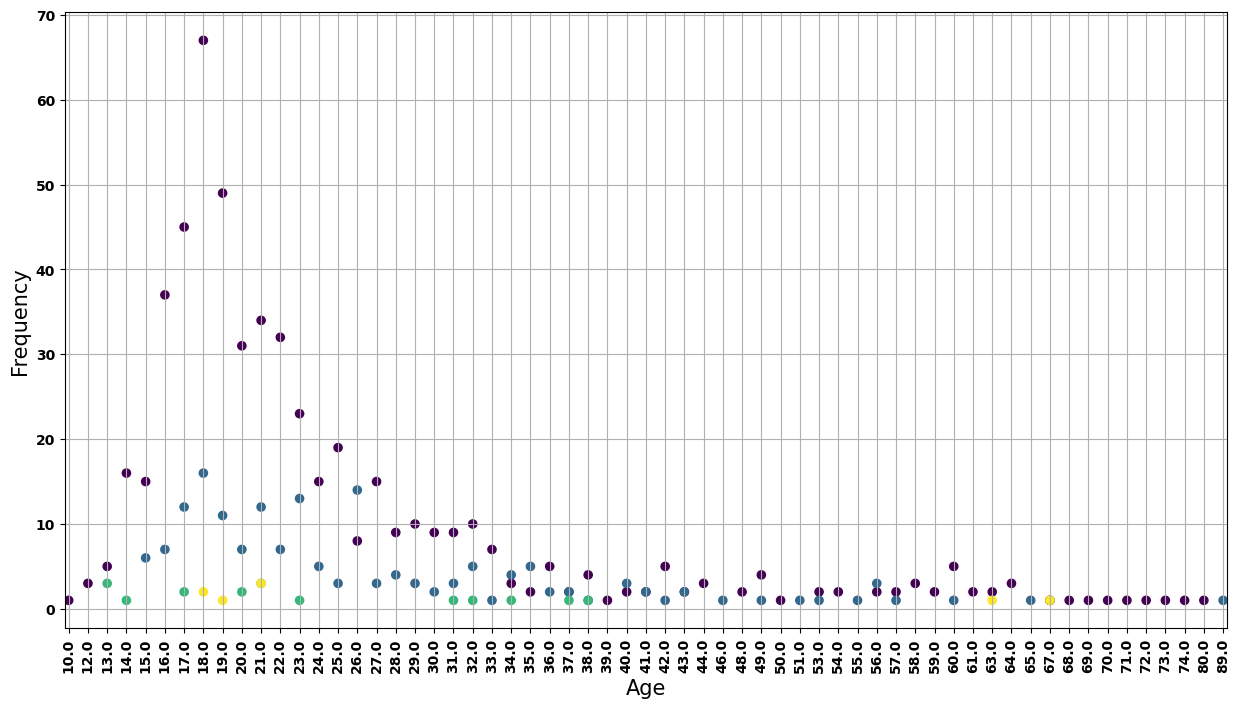

In [ ]:
from operator import itemgetter


le = LabelEncoder()


df = df.sort_values(by=['Age'])
age_vals = np.unique(df["Age"].values)

df_2 = df.copy()

df_2["Music effects"] = le.fit_transform(df["Music effects"])
u= np.unique(df_2["Music effects"])

counters = {}
eff = {}

for j in range(len(u)):
  for z in range(len(age_vals)):
    for i in range(len(df_2)):

        key = str(df_2["Music effects"].iloc[i]) + str(df_2["Age"].iloc[i])

        if df_2["Music effects"].iloc[i] == u[j] and df_2["Age"].iloc[i] == age_vals[z]:

            if key in counters.keys():

              counters[key] += 1
              eff[key] = df_2["Music effects"].iloc[i]

            else:

              counters[key] = 1
              eff[key] = df_2["Music effects"].iloc[i]

ks = list(counters.keys())

keys = []
inds = []

for i in range(len(ks)):
  keys.append([ks[i][1:], ks[i], eff[ks[i]]])

keys = sorted(keys, key = itemgetter(0))

y_label = []
x_label = []
colors = []

for i in range(len(keys)):
  x_label.append(keys[i][0])
  y_label.append(counters[keys[i][1]])
  colors.append(keys[i][2])

ls = colors
mn = min(ls)
mx = max(ls)

colors = ((ls  -  mn) / (mx  -  mn))

plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams["figure.autolayout"] = False

plt.margins(x = 0.0035, tight = False)

plt.yticks(fontweight = "bold")
plt.xticks(rotation = 90, fontweight = "bold")
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)


graph = plt.scatter(x = x_label, y = y_label, c = colors, s = 35)
plt.grid(which="both",alpha = 1.0)



In [ ]:
import numpy as np

df_3 = df.copy()
df = df[df["Age"] <= 80]

#Getting only "While working = yes" individuals

df_3 = df_3[df_3["While working"] == "Yes"]

#Getting only people who like to explore new things

df_3 = df_3[df_3["Exploratory"] == "Yes"]

#Getting only people with BPM >= 70

df_3 = df_3[df_3["BPM"] >= 70]

#Calculating the median of mental health issues ratings

def calc_avg_mh(df_temp):

  Anxiety = df_temp["Anxiety"].values
  Depression = df_temp["Depression"].values
  OCD = df_temp["OCD"].values
  Insomnia = df_temp["Insomnia"].values
  avg = []

  for i in range(len(df_temp)):
    avg.append(np.average([Anxiety[i], Depression[i], OCD[i], Insomnia[i]]))

  if 10 not in avg:
    avg.append(10)

  return 10 - np.array(avg)

def calc_overall_avg_mh(genre,df_temp):

  Anxiety = df_temp[df_temp[genre] == "Very frequently"]["Anxiety"].values
  Depression = df_temp[df_temp[genre] == "Very frequently"]["Depression"].values
  OCD = df_temp[df_temp[genre] == "Very frequently"]["OCD"].values
  Insomnia = df_temp[df_temp[genre] == "Very frequently"]["Insomnia"].values

  avg_freq = np.median([*Anxiety, *Depression, *OCD, *Insomnia].copy())

  Anxiety = df_temp[df_temp[genre] == "Sometimes"]["Anxiety"].values
  Depression = df_temp[df_temp[genre] == "Sometimes"]["Depression"].values
  OCD = df_temp[df_temp[genre] == "Sometimes"]["OCD"].values
  Insomnia = df_temp[df_temp[genre] == "Sometimes"]["Insomnia"].values

  avg_somet = np.median([*Anxiety, *Depression, *OCD, *Insomnia].copy())

  Anxiety = df_temp[df_temp[genre] == "Rarely"]["Anxiety"].values
  Depression = df_temp[df_temp[genre] == "Rarely"]["Depression"].values
  OCD = df_temp[df_temp[genre] == "Rarely"]["OCD"].values
  Insomnia = df_temp[df_temp[genre] == "Rarely"]["Insomnia"].values

  avg_rare = np.median([*Anxiety, *Depression, *OCD, *Insomnia].copy())

  Anxiety = df_temp[df_temp[genre] == "Never"]["Anxiety"].values
  Depression = df_temp[df_temp[genre] == "Never"]["Depression"].values
  OCD = df_temp[df_temp[genre] == "Never"]["OCD"].values
  Insomnia = df_temp[df_temp[genre] == "Never"]["Insomnia"].values

  avg_never = np.median([*Anxiety, *Depression, *OCD, *Insomnia].copy())


  return ((10 - avg_freq) + 90, (10 - avg_somet) + 90 , (10 - avg_rare) + 90, (10 - avg_never) + 90 )



fig = make_subplots(3,4)

#Classical

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Classical]")

overall_avg_mh = calc_overall_avg_mh("Frequency [Classical]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_1_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")
trace_1_1 = go.Scatter(x=df_3["Frequency [Classical]"], y=df_3["Age"], mode="markers", name="Classical - Improve", marker = dict(size = avg_vals, color  = "red", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Classical]")
avg_vals = calc_avg_mh(df_3)
trace_1_2 = go.Scatter(x=df_3["Frequency [Classical]"], y=df_3["Age"], mode="markers", name="Classical - No Effect", marker = dict(size = avg_vals, color  = "red", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

#EDM

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [EDM]")

overall_avg_mh = calc_overall_avg_mh("Frequency [EDM]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_2_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")
trace_2_1 = go.Scatter(x=df_3["Frequency [EDM]"], y=df_3["Age"], mode="markers", name="EDM - Improve", marker = dict(size = avg_vals, color  = "orange", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [EDM]")

avg_vals = calc_avg_mh(df_3)
trace_2_2 = go.Scatter(x=df_3["Frequency [EDM]"], y=df_3["Age"], mode="markers", name="EDM - No Effect", marker = dict(size = avg_vals, color  = "orange", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

#Gospel

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Gospel]")

overall_avg_mh = calc_overall_avg_mh("Frequency [Gospel]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_3_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")
trace_3_1 = go.Scatter(x=df_3["Frequency [Gospel]"], y=df_3["Age"], mode="markers", name="Gospel - Improve", marker = dict(size = avg_vals, color  = "green", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])


df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Gospel]")
avg_vals = calc_avg_mh(df_3)
trace_3_2 = go.Scatter(x=df_3["Frequency [Gospel]"], y=df_3["Age"], mode="markers", name="Gospel - No Effect", marker = dict(size = avg_vals, color  = "green", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

#Rap

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Rap]")

overall_avg_mh = calc_overall_avg_mh("Frequency [Rap]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_4_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")
trace_4_1 = go.Scatter(x=df_3["Frequency [Rap]"], y=df_3["Age"], mode="markers", name="Rap - Improve", marker = dict(size = avg_vals, color  = "blue", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Rap]")
avg_vals = calc_avg_mh(df_3)
trace_4_2 = go.Scatter(x=df_3["Frequency [Rap]"], y=df_3["Age"], mode="markers", name="Rap - No Effect", marker = dict(size = avg_vals, color  = "blue", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

#Country

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Country]")

overall_avg_mh = calc_overall_avg_mh("Frequency [Country]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_5_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")
trace_5_1 = go.Scatter(x=df_3["Frequency [Country]"], y=df_3["Age"], mode="markers", name="Country - Improve", marker = dict(size = avg_vals, color  = "black", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Country]")
avg_vals = calc_avg_mh(df_3)
trace_5_2 = go.Scatter(x=df_3["Frequency [Country]"], y=df_3["Age"], mode="markers", name="Country - No Effect", marker = dict(size = avg_vals, color  = "black", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

#Metal

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Metal]")

overall_avg_mh = calc_overall_avg_mh("Frequency [Metal]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_6_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")
trace_6_1 = go.Scatter(x=df_3["Frequency [Metal]"], y=df_3["Age"], mode="markers", name="Metal - Improve", marker = dict(size = avg_vals, color  = "darkcyan", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Metal]")
avg_vals = calc_avg_mh(df_3)
trace_6_2 = go.Scatter(x=df_3["Frequency [Metal]"], y=df_3["Age"], mode="markers", name="Metal - No Effect", marker = dict(size = avg_vals, color  = "darkcyan", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

#R&B

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [R&B]")

overall_avg_mh = calc_overall_avg_mh("Frequency [R&B]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_7_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")
trace_7_1 = go.Scatter(x=df_3["Frequency [R&B]"], y=df_3["Age"], mode="markers", name="R&B - Improve", marker = dict(size = avg_vals, color  = "sienna", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [R&B]")
avg_vals = calc_avg_mh(df_3)
trace_7_2 = go.Scatter(x=df_3["Frequency [R&B]"], y=df_3["Age"], mode="markers", name="R&B - No Effect", marker = dict(size = avg_vals, color  = "sienna", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

#Folk

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Folk]")

overall_avg_mh = calc_overall_avg_mh("Frequency [Folk]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_8_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")

trace_8_1 = go.Scatter(x=df_3["Frequency [Folk]"], y=df_3["Age"], mode="markers", name="Folk - Improve", marker = dict(size = avg_vals, color  = "olivedrab", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Folk]")
avg_vals = calc_avg_mh(df_3)
trace_8_2 = go.Scatter(x=df_3["Frequency [Folk]"], y=df_3["Age"], mode="markers", name="Folk - No Effect", marker = dict(size = avg_vals, color  = "olivedrab", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])
#Hip hop

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Hip hop]")

overall_avg_mh = calc_overall_avg_mh("Frequency [Hip hop]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_9_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")

trace_9_1 = go.Scatter(x=df_3["Frequency [Hip hop]"], y=df_3["Age"], mode="markers", name="Hip hop - Improve", marker = dict(size = avg_vals, color  = "magenta", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Hip hop]")
avg_vals = calc_avg_mh(df_3)
trace_9_2 = go.Scatter(x=df_3["Frequency [Hip hop]"], y=df_3["Age"], mode="markers", name="Hip hop - No Effect", marker = dict(size = avg_vals, color  = "magenta", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])
#Rock

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Rock]")

overall_avg_mh = calc_overall_avg_mh("Frequency [Rock]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_10_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")

trace_10_1 = go.Scatter(x=df_3["Frequency [Rock]"], y=df_3["Age"], mode="markers", name="Rock - Improve", marker = dict(size = avg_vals, color  = "mediumslateblue", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Rock]")
avg_vals = calc_avg_mh(df_3)
trace_10_2 = go.Scatter(x=df_3["Frequency [Rock]"], y=df_3["Age"], mode="markers", name="Rock - No Effect", marker = dict(size = avg_vals, color = "mediumslateblue", symbol="cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])
#Pop

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Pop]")

overall_avg_mh = calc_overall_avg_mh("Frequency [Pop]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_11_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")

trace_11_1 = go.Scatter(x=df_3["Frequency [Pop]"], y=df_3["Age"], mode="markers", name="Pop - Improve", marker = dict(size = avg_vals,  color  = "salmon", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Pop]")
avg_vals = calc_avg_mh(df_3)
trace_11_2 = go.Scatter(x=df_3["Frequency [Pop]"], y=df_3["Age"], mode="markers", name="Pop - No Effect", marker = dict(size = avg_vals,  color  = "salmon", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

#Jazz

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "Improve"]
df_3 = df_3.sort_values(by="Frequency [Jazz]")

overall_avg_mh = overall_avg_mh = calc_overall_avg_mh("Frequency [Jazz]", df_3)
avg_vals = calc_avg_mh(df_3)

trace_12_0 = go.Scatter(y = overall_avg_mh, x = ["Never","Rarely","Sometimes","Very frequently"], showlegend = False, marker = dict(color = "black"), hovertemplate="Frequency: %{x}<br> All Avg MHR: 0.%{y} <extra></extra>")

trace_12_1 = go.Scatter(x=df_3["Frequency [Jazz]"], y=df_3["Age"], mode="markers", name="Jazz - Improve", marker = dict(size = avg_vals,  color  = "darkslategrey", symbol = "circle"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

df_3 = df.copy()
df_3 = df_3[df["Music effects"] == "No effect"]
df_3 = df_3.sort_values(by="Frequency [Jazz]")
avg_vals = calc_avg_mh(df_3)
trace_12_2 = go.Scatter(x=df_3["Frequency [Jazz]"], y=df_3["Age"], mode="markers", name="Jazz - No Effect", marker = dict(size = avg_vals,  color  = "darkslategrey", symbol = "cross"),
                     hovertext = ["Pers. MHR Avg =  " + ("0." + str(i).replace(".", "") if i < 10 else "1.00") for i in avg_vals])

fig.add_trace(trace_1_0, row=1, col=1)
fig.add_trace(trace_1_1, row=1, col=1)
fig.add_trace(trace_1_2, row=1, col=1)

fig.add_trace(trace_2_0, row=1, col=2)
fig.add_trace(trace_2_1, row=1, col=2)
fig.add_trace(trace_2_2, row=1, col=2)

fig.add_trace(trace_3_0, row=1, col=3)
fig.add_trace(trace_3_1, row=1, col=3)
fig.add_trace(trace_3_2, row=1, col=3)

fig.add_trace(trace_4_0, row=1, col=4)
fig.add_trace(trace_4_1, row=1, col=4)
fig.add_trace(trace_4_2, row=1, col=4)

fig.add_trace(trace_5_0, row=2, col=1)
fig.add_trace(trace_5_1, row=2, col=1)
fig.add_trace(trace_5_2, row=2, col=1)

fig.add_trace(trace_6_0, row=2, col=2)
fig.add_trace(trace_6_1, row=2, col=2)
fig.add_trace(trace_6_2, row=2, col=2)

fig.add_trace(trace_7_0, row=2, col=3)
fig.add_trace(trace_7_1, row=2, col=3)
fig.add_trace(trace_7_2, row=2, col=3)

fig.add_trace(trace_8_0, row=2, col=4)
fig.add_trace(trace_8_1, row=2, col=4)
fig.add_trace(trace_8_2, row=2, col=4)

fig.add_trace(trace_9_0, row=3, col=1)
fig.add_trace(trace_9_1, row=3, col=1)
fig.add_trace(trace_9_2, row=3, col=1)

fig.add_trace(trace_10_0, row=3, col=2)
fig.add_trace(trace_10_1, row=3, col=2)
fig.add_trace(trace_10_2, row=3, col=2)

fig.add_trace(trace_11_0, row=3, col=3)
fig.add_trace(trace_11_1, row=3, col=3)
fig.add_trace(trace_11_2, row=3, col=3)

fig.add_trace(trace_12_0, row=3, col=4)
fig.add_trace(trace_12_1, row=3, col=4)
fig.add_trace(trace_12_2, row=3, col=4)


fig.update_xaxes(tickangle=90, tickfont=dict(size=13))

fig.add_annotation(
    text="Age & MHR Vs. Frequency of Listening to Music Genre",
    font_size=20,
    showarrow=False,
    xanchor="center", yanchor="bottom",
    xref="x domain", yref="y domain",
    x=2.5, y=1.1,
    bordercolor="black",
    borderpad=5,
)

fig.update_yaxes(ticks="outside", tickvals= list(np.arange(0, 110, 10)), ticktext=list(np.concatenate([np.arange(0,90,10), np.array(["0.9 MHR","1 MHR"])])))

fig.update_layout(height= 40 * 40 + 100, legend = go.layout.Legend(itemsizing="constant", borderwidth = 1, bordercolor = "black", title = "Music Genre & Effect: "))

fig.show()